In [2]:
from datasets.load import load_images, load_annotations
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

%matplotlib inline
plt.rcParams['figure.figsize'] = (15., 12.) # set default size of plots
#plt.rcParams['image.interpolation'] = 'nearest'
#plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
%load_ext autoreload
%autoreload 2

In [6]:
classes = load_annotations('train', 'datasets', size=128)

## save positive samples to disk

In [7]:
# write classes to .pkl files
import pickle
import os

for name, imgs in classes.items():
    path = os.path.join('cache_anno', '{}.pkl'.format(name))
    with open(path, 'wb') as f:
        pickle.dump(imgs, f)
    print('wrote class: {} with {} samples to {}'.format(name, len(imgs), path)) 
# Free memory
classes = None

wrote class: waldo with 124 samples to cache_anno/waldo.pkl
wrote class: wenda with 36 samples to cache_anno/wenda.pkl
wrote class: wizard with 24 samples to cache_anno/wizard.pkl


## Generate negative samples

In [3]:
samples = load_images('train', 'datasets')

In [4]:
import pickle
import os
import cv2

img_size = (128, 128)
num_neg_samples = 10000
neg_samples = []
for sample in samples:
    sy, sx = sample['img'].shape[:2]
    for scale in np.random.uniform(low=0.1, high=1, size=5):
        if sy*scale - img_size[0] <= 5 or sx*scale - img_size[1] <= 5:
            continue
    
        r = cv2.resize(sample['img'], dsize=(int(sx*scale), int(sy*scale)))
        
        views = zip(np.random.randint(low=0, high=r.shape[0] - img_size[0], size=num_neg_samples//(len(samples) * 5)),
                   np.random.randint(low=0, high=r.shape[1] - img_size[1], size=num_neg_samples//(len(samples) * 5)))
        for v in views:
            neg_samples.append(
                r[v[0]:v[0] + img_size[0], v[1]:v[1] + img_size[1]])

np.random.shuffle(neg_samples)
# Free samples
samples = None

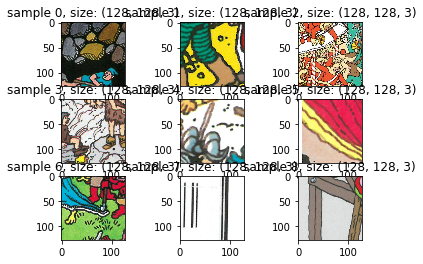

9856


In [5]:
for idx, sample in enumerate(neg_samples[:9]):
    ax = plt.subplot(3,3,idx +1)
    plt.imshow(sample)
    plt.title('sample {}, size: {}'.format(idx, sample.shape))

plt.show()
print(len(neg_samples))

#write neg_samples to disk
with open('cache_anno/neg_samples.pkl', 'wb') as f:
    pickle.dump(neg_samples, f)